In [57]:
import pandas as pd
import numpy as np

In [58]:
survey=pd.read_excel('Sample Survey.xlsx',sheet_name='Data')
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [59]:
survey.shape

(6867, 14)

In [60]:
survey.describe()

,response_id,assembly_no,weight
count,6867.000000,6867.000000,6867.000000
mean,3434.000000,130.843017,0.995800
std,1982.476482,66.420060,2.074578
min,1.000000,1.000000,0.001089
25%,1717.500000,79.000000,0.137896
50%,3434.000000,135.000000,0.369789
75%,5150.500000,184.000000,0.956474
max,6867.000000,243.000000,51.075631


In [61]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [62]:
survey.isna().sum()

response_id         0
collection_date     0
urban_rural         0
education           0
income              0
Vote_Now            0
Past_Vote           0
CM_satisfaction     0
MLA_satisfaction    0
age                 0
gender              0
assembly_no         0
category            0
weight              0
dtype: int64

In [63]:
survey.nunique()

response_id         6867
collection_date        9
urban_rural            2
education              7
income                 8
Vote_Now              18
Past_Vote             14
CM_satisfaction        5
MLA_satisfaction       5
age                   60
gender                 3
assembly_no          241
category               5
weight              1561
dtype: int64

2.How many samples were collected on each day?

In [64]:
survey['collection_date'].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

3.What proportion of the total respondents were aged less than 45?

In [65]:
survey.loc[123,'age']

'24ko'

In [66]:
survey['age'] = pd.to_numeric(survey['age'],errors='coerce')
survey = survey.replace(np.nan, 24, regex=True)
survey['age'] = survey['age'].astype(int)
print (survey.dtypes)

response_id                  int64
collection_date     datetime64[ns]
urban_rural                 object
education                   object
income                      object
Vote_Now                    object
Past_Vote                   object
CM_satisfaction             object
MLA_satisfaction            object
age                          int64
gender                      object
assembly_no                  int64
category                    object
weight                     float64
dtype: object


In [67]:
total_respondents_aged_below_45_percentage = len(survey[survey['age']<45]) / len(survey) *100
total_respondents_aged_below_45_percentage

93.18479685452162

4. Create a new column in the dataframe “age_group”. This column should contain the age
group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation:


In [68]:
survey['age']
bins = [18,25,40,55,100] 
labels = ['18-25', '25-40', '40-55', '55+']
survey['age_group'] = pd.cut(survey['age'], bins,labels = labels)
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,18-25
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


In [69]:
age_group=survey.iloc[:,[0,9,14]]
age_group.head()

,response_id,age,age_group
0,1,26,25-40
1,2,34,25-40
2,3,25,18-25
3,4,36,25-40
4,5,22,18-25


5.How many samples were collected for each age-group? Which age-group had the most
samples?

In [70]:
survey['age_group'].value_counts()

25-40    3423
18-25    2567
40-55     644
55+       108
Name: age_group, dtype: int64

6.What proportion of the respondents had opted for the RJD party in both the Vote_Now
and the Past_Vote questions?

In [71]:
vote_now=len(survey[survey['Vote_Now']=="RJD"])  / len(survey) *100
vote_now

29.066550167467597

In [72]:
past_vote=len(survey[survey['Past_Vote']=="RJD"])  / len(survey) *100
past_vote

15.246832678025338

In [73]:
#proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote
len(survey[(survey['Vote_Now']=='RJD')  & (survey['Past_Vote']=='RJD')])/len(survey)*100

11.810106305519149

7.For each day of sample collection, determine the proportion of respondents who were
fully satisfied with the performance of the CM. So if there were a total of 1000 samples
on day 1 and 300 out of those said they were fully satisfied, then our answer for that day
would be 0.3.

In [74]:
survey.groupby(by='collection_date')[['CM_satisfaction']].apply(lambda x:np.sum(x=='Fully Satisfied')/len(x)*100)

,CM_satisfaction
collection_date,
2020-08-24,9.871535
2020-08-25,9.519038
2020-08-26,9.866221
2020-08-27,8.120301
2020-08-28,12.089356
2020-08-29,11.774194
2020-08-30,11.168385
2020-08-31,11.131059
2020-09-01,12.355848


8.In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [75]:
mla_satisfaction=pd.DataFrame(survey.groupby(by='collection_date')[['MLA_satisfaction']].apply(lambda x:np.sum(x=='Fully Dissatisfied')/len(x)*100))
mla_satisfaction

,MLA_satisfaction
collection_date,
2020-08-24,59.972955
2020-08-25,63.126253
2020-08-26,59.030100
2020-08-27,60.601504
2020-08-28,60.709593
2020-08-29,56.451613
2020-08-30,62.027491
2020-08-31,57.630162
2020-09-01,63.426689


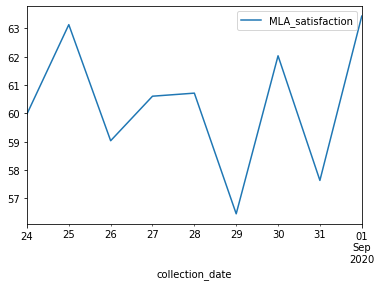

In [76]:
import datetime
mla_satisfaction.index.date
mla_satisfaction.plot()

9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and
cell values as the count of samples


In [77]:
pd.crosstab(survey.Past_Vote, survey.Vote_Now,margins=True, margins_name="Total")

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP,Total
Past_Vote,,,,,,,,,,,,,,,,,,,
BJP,7,1,1630,3,5,42,101,110,44,13,194,32,87,370,88,24,62,10,2823
BSP,0,1,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9
Did not vote,8,5,231,2,1,22,41,69,10,16,83,11,51,195,20,3,31,5,804
HAM,2,0,25,0,1,0,3,2,2,0,4,0,0,6,4,0,1,0,50
INC,0,6,6,0,0,57,10,9,0,3,6,3,3,100,1,2,7,0,213
JAP(L),0,0,4,0,0,0,35,0,0,0,0,1,0,2,0,0,0,0,42
JD(U),6,10,254,2,2,45,72,279,29,9,90,18,43,435,13,25,36,6,1374
LJP,0,0,76,1,0,4,3,6,9,2,3,0,2,17,1,0,1,0,125
Left Front,0,1,2,0,0,1,0,0,0,18,1,1,0,4,0,1,0,1,30


10. Repeat the above question with the cell values as the sum of “weight”.


In [78]:
pd.crosstab(survey.Past_Vote, survey.Vote_Now, survey.weight ,aggfunc="sum", colnames=[None])

#OR
#pd.crosstab(index=[survey.Past_Vote], columns=[survey.Vote_Now], values=survey.weight, aggfunc=sum)

,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


In [79]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,18-25
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


11. Create a dataframe by performing a group by over age_group and calculate the count of
total samples under each age_group

In [80]:
Total_Samples_under_age_group=pd.DataFrame(survey['age_group'].value_counts())
Total_Samples_under_age_group

,age_group
25-40,3423
18-25,2567
40-55,644
55+,108


12. Create a dataframe by performing a group by over age_group and finding the count of
total samples for each age_group that opted for the JD(U) party in Vote_Now.


In [81]:
age_group_opted_JDU=pd.DataFrame(survey.groupby(["age_group"])["Vote_Now"].apply(lambda x:np.sum(x=='JD(U)')))
age_group_opted_JDU

,Vote_Now
age_group,
18-25,199
25-40,245
40-55,55
55+,10


13.Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group

In [82]:
frames = [Total_Samples_under_age_group,age_group_opted_JDU]
result = pd.merge(Total_Samples_under_age_group,age_group_opted_JDU, how="right", on=["age_group"])
result

,age_group,Vote_Now
0,18-25,199
1,25-40,245
2,40-55,55
3,55+,10
